# LeNet Lab
![LeNet Architecture](assets/images/lenet.png)
Source: Yan LeCun

## Load Data

Load the **German Traffic Sign Dataset**, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'assets/data/train.p'
validation_file='assets/data/valid.p'
testing_file= 'assets/data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

31


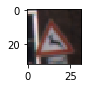

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_train[index])

## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [3]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [4]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

## TODO: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [5]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x12.
    # The formula for convolutions tell us:
    # out_h = (in_h - filter_h + 1)/strides[1]
    # out_w = (in_w - filter_w + 1)/strides[2]
    # this layer has a 3x3 filter with in_depth 3 and out_depth 12
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5,5,3,6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    # we use conv2d to convolve the filter over the imgs and add bias at end
    conv1 = tf.nn.conv2d(x, conv1_W, strides = [1,1,1,1], padding = 'VALID') + conv1_b

    # TODO: Activation.
    # we activate the conv1 of the convolutional layer with relu activation function
    conv1 = tf.nn.relu(conv1)
    
    # TODO: Pooling. Input = 28x28x12. Output = 14x14x12.
    # we pool the conv1 using 2x2 kernel with 2x2 stride
    # filter size = 2x2
    # moves at stride of 2
    # out_h = (in_h - filter_h)/S + 1
    # out_w = (in_w - filter_w)/S + 1
    conv1 = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # the network then runs through another set of convolutional, activation and pooling layers outputting 5x5x16
    
    # TODO: Layer 2: Convolutional. Output = 10x10x24.
    # use same hxw dimension as conv1
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    # move at stride of 1
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1,1,1,1], padding = 'VALID') + conv2_b
    
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # TODO: Pooling. Input = 10x10x24. Output = 5x5x24.
    # filter size = 2
    # moves at stride of 2
    conv2 = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    # we flatten this output into a vector, the length of the vector =  5x5x30 = 750.
    fc0 = flatten(conv2)
    
    # TODO: Layer 3: Fully Connected. Input = 750. Output = 120.
    # we pass this vector into a fully connected layer with a width of 120
    # shape=(height, width)
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400,120), mean = mu, stddev = sigma))
    # tf.zeros(120) is 1D array with 120 elements that are 0
    fc1_b = tf.Variable(tf.zeros(120))
    # x*W + b
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b
    
    # TODO: Activation.
    # then we apply relu to the output of the fc1
    fc1 = tf.nn.relu(fc1)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    # we repeat the fc again with width of 84
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120,84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    # x*W + b
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b
    
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    # finally we attach a fc output layer with a width equal to the number of classes in our label set
    # in this case, we have 43 classes, one for traffic sign
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84,43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    # x*W + b
    # these outputs are also known as our logits, which is what we return from our lenet function
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [6]:
# set the batch of input imgs to none, which will allow the placeholder to later accept a batch of any size
# img dimensions are set to 32x32x1
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
# y stores our labels, our labels come through as sparse variables, they are ints they aren't one hot encoded yet
y = tf.placeholder(tf.int32, (None))
# we use tf.one_hot function to one hot encode the labels
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [7]:
# this is our training pipeline, you have to pass data into it for it to work

# we have another hyperparameter, learning rate tells tensorflow how quickly to update the networks weights
rate = 0.001
# we pass the input data to LeNet function to calculate our logits
logits = LeNet(x)
# we use the softmax cross entropy function to compare those logits to the ground truth labels
# and calculate the cross entropy. Cross entropy is a measure of how different the logits are
# from the ground truth labels
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
# The tf.reduce_mean function averages the cross entropy from all the training imgs
loss_operation = tf.reduce_mean(cross_entropy)
# Adam optimizer uses the Adam algorithm to minimize the loss function
# Similar to the stochastic gradient descent, Adam is a little more sophisticated than it
# this is where we use the learning rate hyperparameter set earlier
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
# finally we use minimize function on the optimizer, which uses backpropagation to update the network
# and minimize our training loss
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [8]:
# Evaluate pipeline evaluates how good the model is

# the below two functions are the entire evaluation pipeline, but in order to run this
# evaluation pipeline, we have to build an evaluate function

# the first step in this pipeline is to measure whether a given prediction is correct
# by comparing the logit prediction to the one hot encoded ground truth label
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

# the second step is to calculate the model's overall accuracy by averaging the individual
# prediction accuracies
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# this function takes a dataset as input, sets some initial variables
# then batches the dataset and runs it through the evaluation pipeline
# the evaluate function averages the accuracy of each batch to calculate the total
# accuracy of the model
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [9]:
# now everything is setup, we can build a function to train and evaluate our model
# first we create the tensorflow session and initialize the variables
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    # we train over whatever number has been set in the EPOCHS hyperparameter
    print("Training...")
    print()
    for i in range(EPOCHS):
        # at the beginning of each EPOCH, we shuffle our training data to ensure that our training isn't bias
        # by the order of the imgs
        X_train, y_train = shuffle(X_train, y_train)
        # then we break our training data into batches and train the model on each batch
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        # at the end of each EPOCH, we evaluate the model on our validation data
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    # once we have completely trained the model we save it that way we can load it up later and modify it
    # or evaluate the model on our test dataset
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.688

EPOCH 2 ...
Validation Accuracy = 0.800

EPOCH 3 ...
Validation Accuracy = 0.838

EPOCH 4 ...
Validation Accuracy = 0.856

EPOCH 5 ...
Validation Accuracy = 0.869

EPOCH 6 ...
Validation Accuracy = 0.877

EPOCH 7 ...
Validation Accuracy = 0.876

EPOCH 8 ...
Validation Accuracy = 0.881

EPOCH 9 ...
Validation Accuracy = 0.895

EPOCH 10 ...
Validation Accuracy = 0.895

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [ ]:
# we evaluate the model on our test dataset
# we should only run the model on the test dataset one time once we are completely done with training
# otherwise we would use the test dataset to choose the best model and then the test dataset wouldn't
# provide a good estimate of how well the model would do in the real world

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))